**ANALISIS DATA TIME SERIES**

" PERBANDINGAN HASIL PERAMALAN HARGA SAHAM HARIAN DARI BANK BCA, BANK SYARIAH INDONESIA DAN BANK DANAMON MENGGUNAKAN METODE ARIMA PERIODE JANUARI 2023 - APRIL 2024 "

# PACKAGE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime, timedelta

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00


# IMPORT DATA

In [ ]:
df_bsi = pd.read_csv("BRIS.JK.csv")
df_bca = pd.read_csv("BBCA.JK.csv")
df_danamon = pd.read_csv("BDMN.JK.csv")

# EKSPLORASI DATA

1. BANK SYARIAH INDONESIA

In [ ]:
df_bsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.2+ KB


Pada dataframe bank BSI dapat dilihat bahwa:

1. kolom date memiliki tipe data yang kurang tepat, maka diperlukan untuk konversi kolom date menjadi tipe data datetime.

2. karna disini kita ingin memprediksi harga saham maka kita akan fokus ke harga close

In [ ]:
df_bsi['Date'] = pd.to_datetime(df_bsi['Date'])
df_bsi_baru = df_bsi[['Date', 'Close']]

In [ ]:
df_bsi_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    313 non-null    datetime64[ns]
 1   Close   313 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [ ]:
df_bsi_baru.isna().sum()

Date     0
Close    0
dtype: int64

Dari output diatas terlihat bahwa kolom close tidak terdapat data yang hilang.

In [ ]:
df_bsi_baru.describe()

,Date,Close
count,313,313.000000
mean,2023-08-28 20:09:58.083067136,1789.952077
min,2023-01-02 00:00:00,1285.000000
25%,2023-05-04 00:00:00,1595.000000
50%,2023-09-01 00:00:00,1680.000000
75%,2023-12-21 00:00:00,1785.000000
max,2024-04-30 00:00:00,2850.000000
std,NaN,368.407541


In [ ]:
df_bsi_baru.duplicated().sum()

0

In [ ]:
#mengubah date menjadi index
df_bsi_baru.set_index('Date', inplace = True)
df_bsi_baru.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=313, freq=None)

In [ ]:
#menginisialisasikan variabel close sebagai data time series
ts_bsi = df_bsi_baru['Close']
ts_bsi.head()

Date
2023-01-02    1285.0
2023-01-03    1395.0
2023-01-04    1385.0
2023-01-05    1335.0
2023-01-06    1390.0
Name: Close, dtype: float64

2. BANK CENTRAL ASIA

In [ ]:
df_bca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
df_bca['Date'] = pd.to_datetime(df_bca['Date'])
df_bca_baru = df_bca[['Date', 'Close']]

In [ ]:
df_bca_baru.isna().sum()

Date     0
Close    0
dtype: int64

In [ ]:
df_bca_baru.duplicated().sum()

0

In [ ]:
df_bca_baru.describe()

,Date,Close
count,313,313.000000
mean,2023-08-28 20:09:58.083067136,9118.370607
min,2023-01-02 00:00:00,8050.000000
25%,2023-05-04 00:00:00,8825.000000
50%,2023-09-01 00:00:00,9075.000000
75%,2023-12-21 00:00:00,9350.000000
max,2024-04-30 00:00:00,10325.000000
std,NaN,459.686937


In [ ]:
#mengubah date menjadi index
df_bca_baru.set_index('Date', inplace = True)
df_bca_baru.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=313, freq=None)

In [ ]:
#menginisialisasikan variabel close sebagai data time series
ts_bca = df_bca_baru['Close']
ts_bca.head()

Date
2023-01-02    8550.0
2023-01-03    8550.0
2023-01-04    8350.0
2023-01-05    8250.0
2023-01-06    8300.0
Name: Close, dtype: float64

3. BANK DANAMON

In [ ]:
df_danamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
df_danamon['Date'] = pd.to_datetime(df_danamon['Date'])
df_danamon_baru = df_danamon[['Date', 'Close']]

In [ ]:
df_danamon_baru.isna().sum()

Date     0
Close    0
dtype: int64

In [ ]:
df_danamon_baru.duplicated().sum()

0

In [ ]:
df_danamon_baru.describe()

,Date,Close
count,313,313.000000
mean,2023-08-28 20:09:58.083067136,2839.137380
min,2023-01-02 00:00:00,2510.000000
25%,2023-05-04 00:00:00,2750.000000
50%,2023-09-01 00:00:00,2840.000000
75%,2023-12-21 00:00:00,2900.000000
max,2024-04-30 00:00:00,3280.000000
std,NaN,130.131431


In [ ]:
#mengubah date menjadi index
df_danamon_baru.set_index('Date', inplace = True)
df_danamon_baru.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=313, freq=None)

In [ ]:
#menginisialisasikan variabel close sebagai data time series
ts_danamon = df_danamon_baru['Close']
ts_danamon.head()

Date
2023-01-02    2750.0
2023-01-03    2730.0
2023-01-04    2650.0
2023-01-05    2620.0
2023-01-06    2620.0
Name: Close, dtype: float64

# VISUALISASI DATA

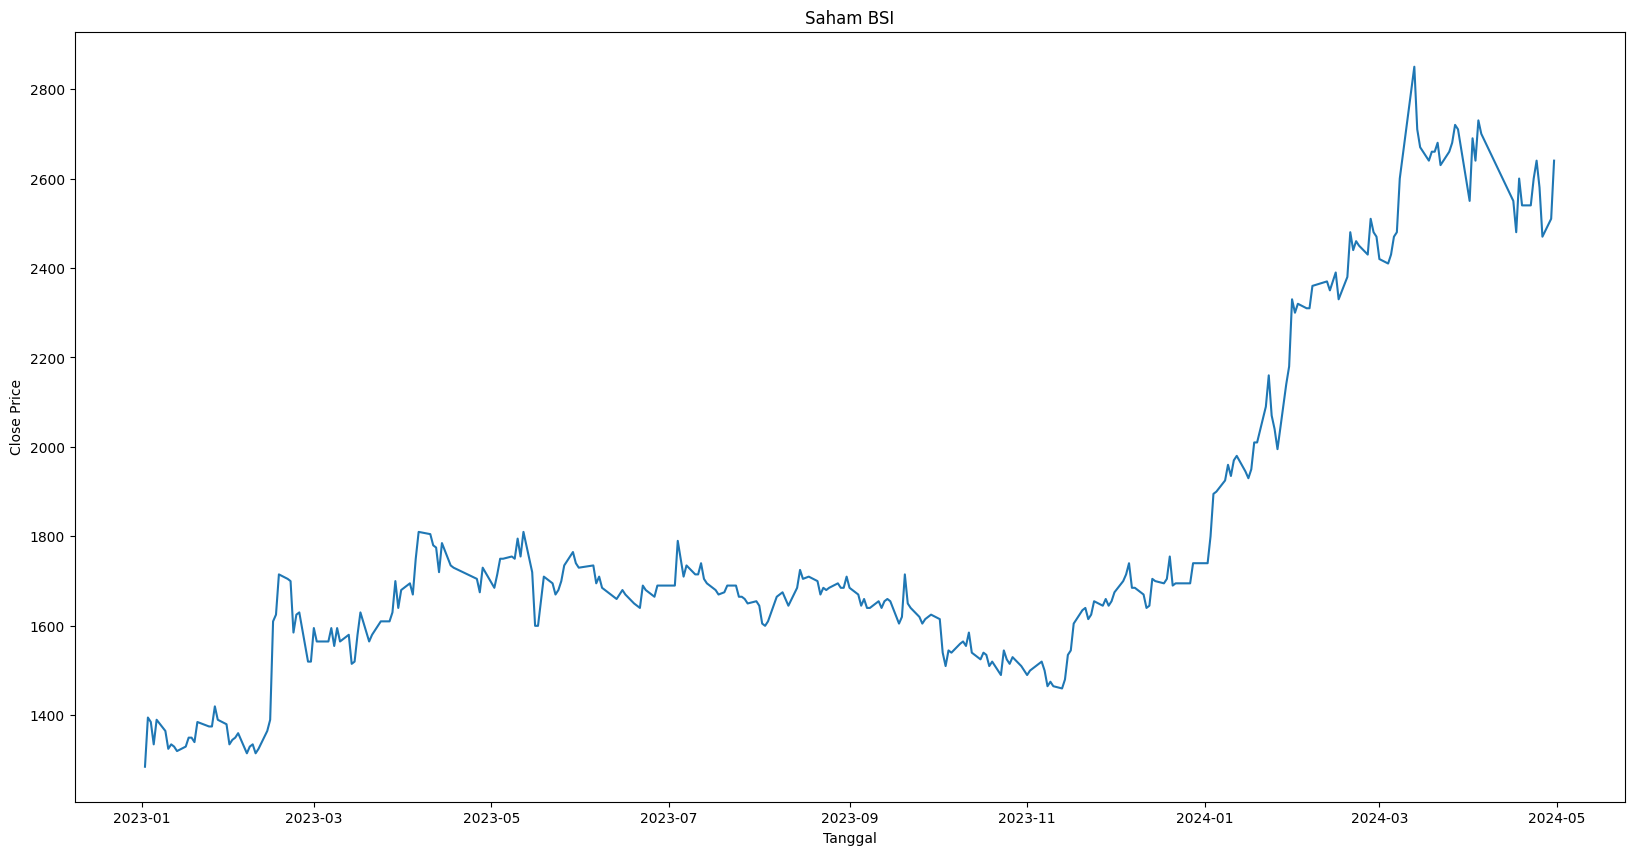

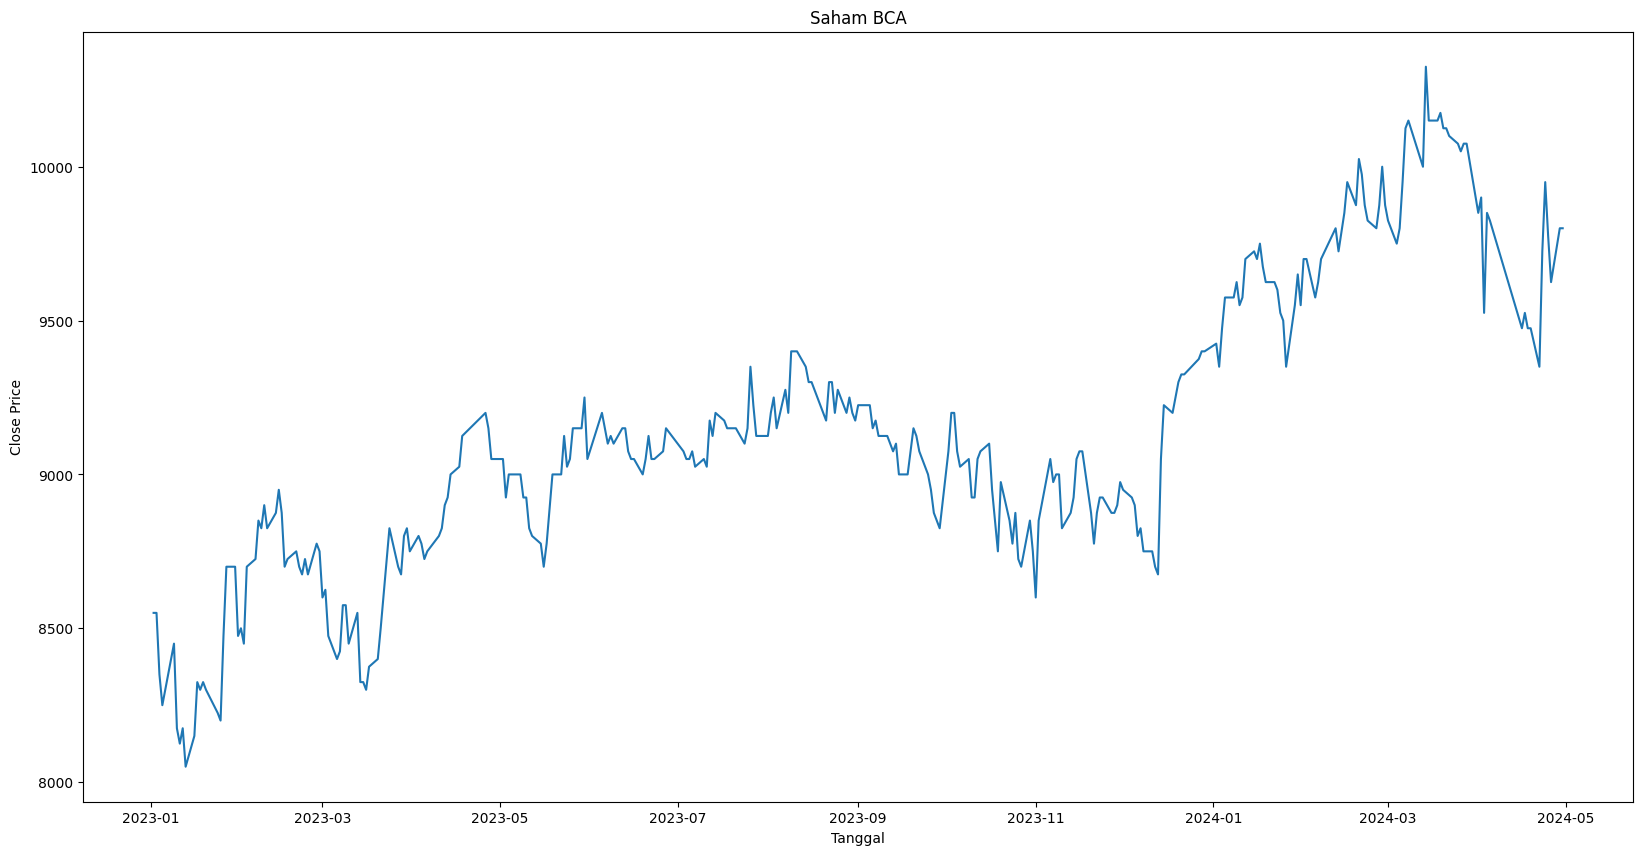

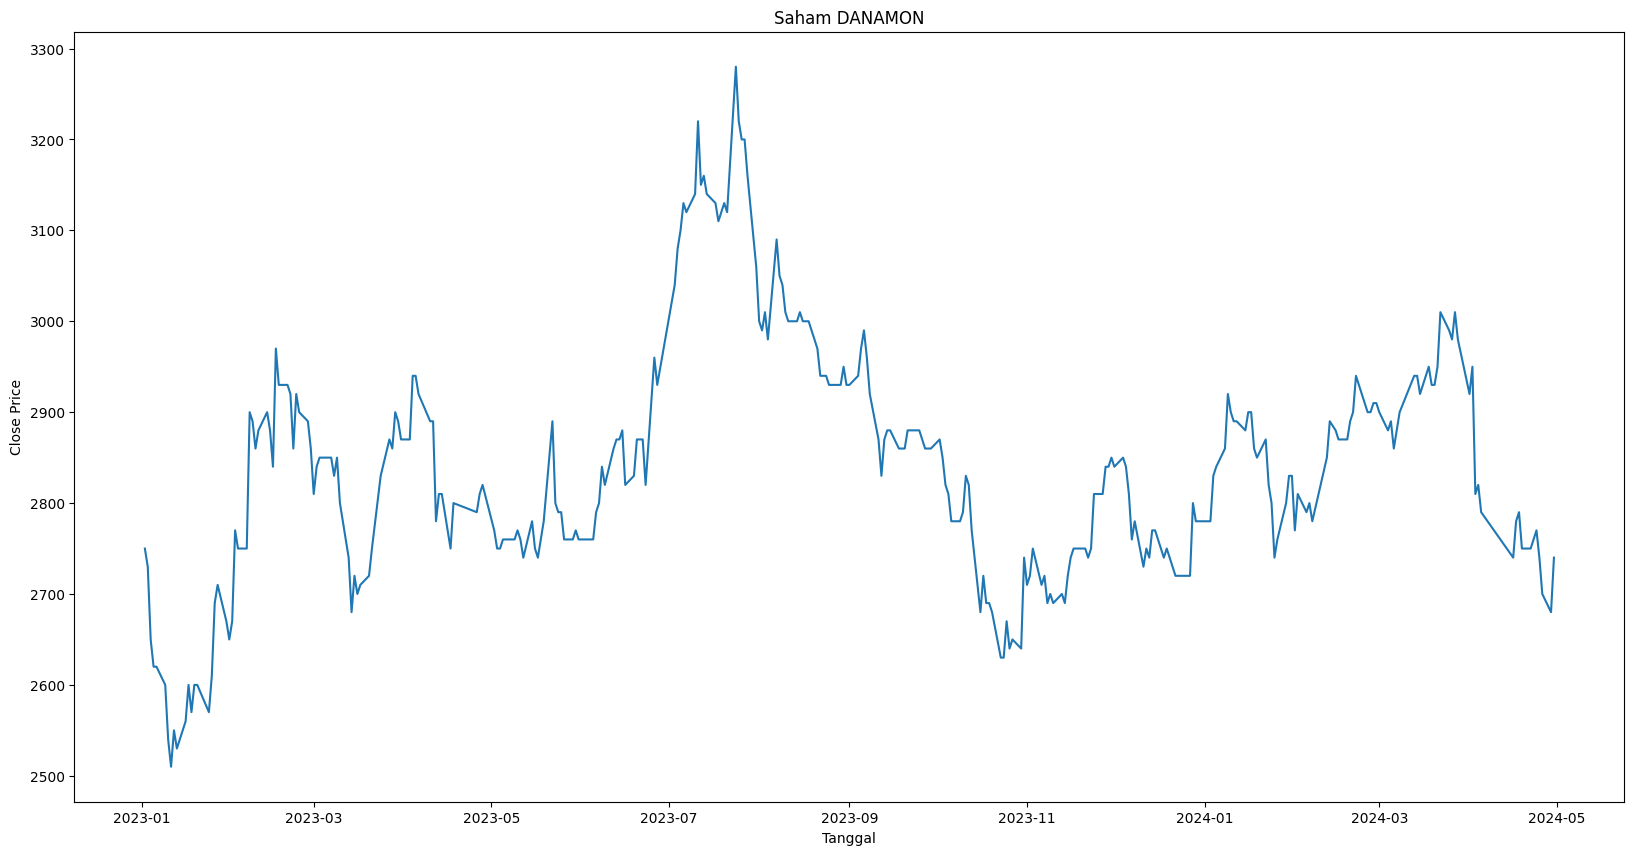

In [ ]:
# BSI
plt.figure(figsize=(20,10))  # Atur ukuran figur
plt.xlabel('Tanggal')
plt.ylabel('Close Price')
plt.title('Saham BSI')
plt.plot(df_bsi_baru['Close'])

# BCA
plt.figure(figsize=(20,10))  # Atur ukuran figur
plt.xlabel('Tanggal')
plt.ylabel('Close Price')
plt.title('Saham BCA')
plt.plot(df_bca_baru['Close'])
plt.show()

# DANAMON
plt.figure(figsize=(20,10))  # Atur ukuran figur
plt.xlabel('Tanggal')
plt.ylabel('Close Price')
plt.title('Saham DANAMON')
plt.plot(df_danamon_baru['Close'])

# plt.figure(figsize=(20,10))
# sns.set_style(('darkgrid'))
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('Saham BSI')
# plt.plot(df_bsi_baru['Close'])

Setelah kita memvisualisasikan saham dalam beberapa tahun. Selanjutnya kita akan menguji stasioneritas data. Uji stasioneritas dalam analisis deret waktu saham diperlukan karena model prediksi saham, seperti model ARIMA memerlukan asumsi bahwa deret waktu tersebut bersifat stasioner. Stasioneritas memungkinkan model untuk lebih akurat merepresentasikan dan memprediksi perilaku pasar, menghilangkan tren dan musiman yang mungkin muncul dalam data, serta meningkatkan konsistensi dan stabilitas model. Dengan memastikan bahwa deret waktu saham bersifat stasioner, analis dapat membangun model yang lebih dapat diandalkan dan memberikan peringatan dini terhadap perubahan yang mungkin terjadi dalam pasar saham, meningkatkan kualitas dan interpretabilitas prediksi saham.

# UJI STASIONERITAS DATA

Kita akan mengecek stasioneritas data menggunakan Uji Augmented Dickey-Fuller (ADF) yang akan mendeteksi stasioneritas dalam bentuk diferensiasi (pengurangan nilai saat ini dengan nilai sebelumnya)

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    #determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


    #perform dickey fuller test
    print('Hasil dari Tes Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-values','#Lags Used','Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

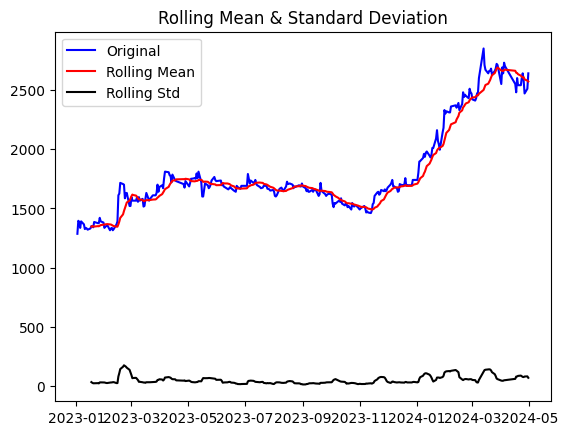

Hasil dari Tes Dickey-Fuller:
Test Statistic                  0.083721
p-values                        0.964932
#Lags Used                      2.000000
Number of Observation Used    310.000000
Critical Value (1%)            -3.451622
Critical Value (5%)            -2.870909
Critical Value (10%)           -2.571762
dtype: float64


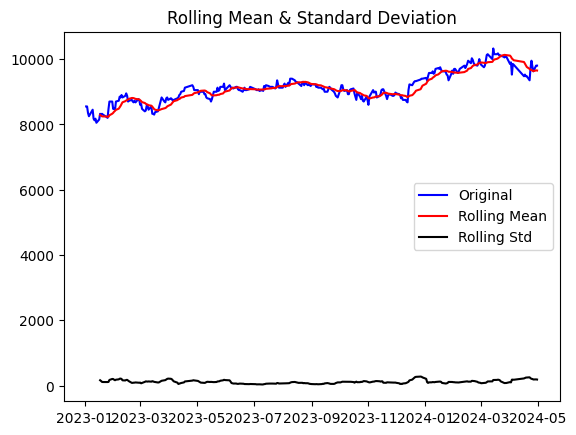

Hasil dari Tes Dickey-Fuller:
Test Statistic                 -1.651028
p-values                        0.456505
#Lags Used                      2.000000
Number of Observation Used    310.000000
Critical Value (1%)            -3.451622
Critical Value (5%)            -2.870909
Critical Value (10%)           -2.571762
dtype: float64


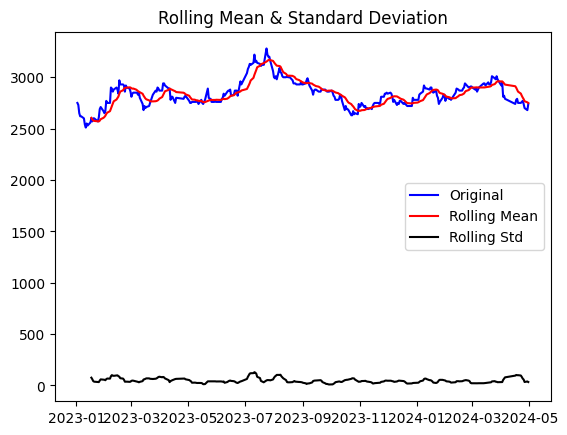

Hasil dari Tes Dickey-Fuller:
Test Statistic                 -2.380021
p-values                        0.147455
#Lags Used                      1.000000
Number of Observation Used    311.000000
Critical Value (1%)            -3.451553
Critical Value (5%)            -2.870879
Critical Value (10%)           -2.571746
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts_bsi)
test_stationarity(ts_bca)
test_stationarity(ts_danamon)

Karna p.values > 0.05 maka h0 diterima. Artinya data dianggap tidak stasioner terhadap rata - rata. Sehingga kita perlu melakukan proses stasionerisasi data yakni menerapkan differencing pada deret waktu. Differencing melibatkan pengurangan nilai saat ini dengan nilai sebelumnya untuk menciptakan deret waktu baru.

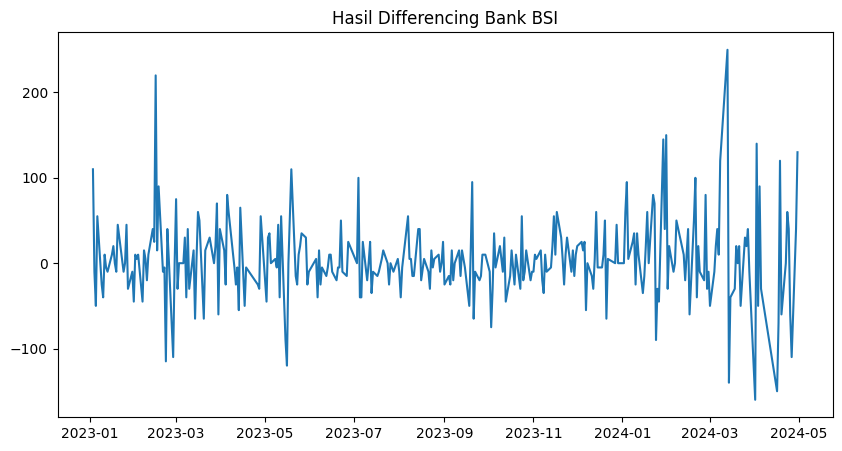

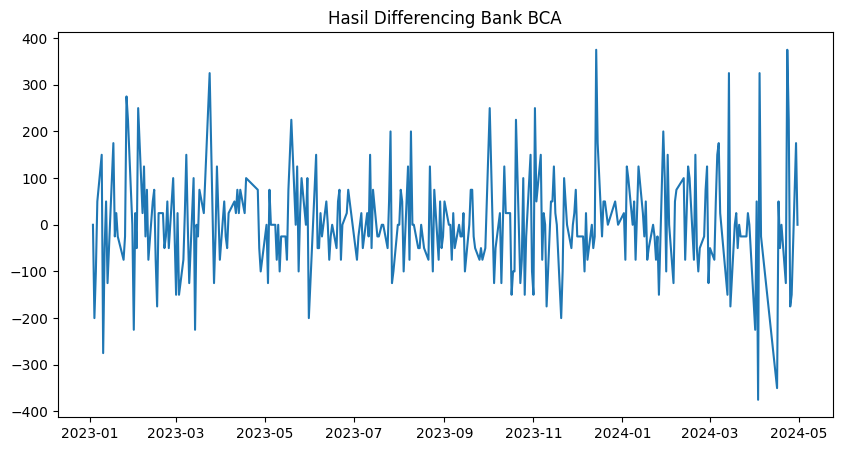

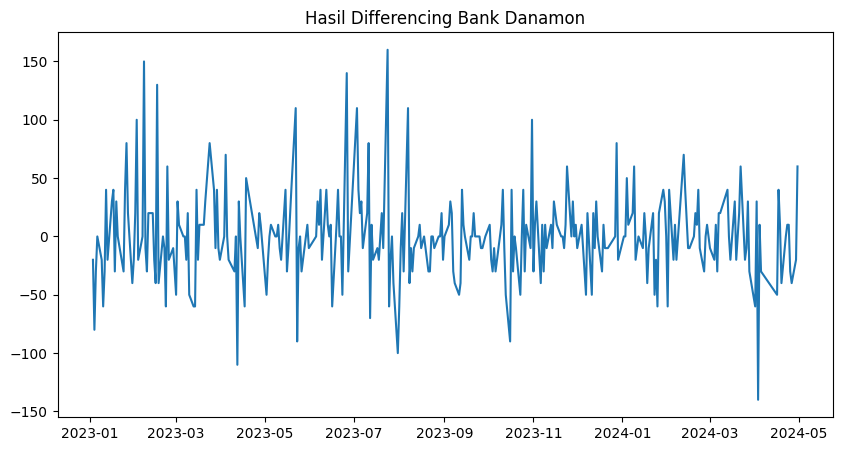

In [ ]:
#differencing mengggunakan Augmented Dickey-Fuller
ts_diff1_bsi = ts_bsi - ts_bsi.shift()
ts_diff1_bsi = ts_diff1_bsi.dropna()
plt.figure(figsize=(10,5))
plt.title("Hasil Differencing Bank BSI")
plt.plot(ts_diff1_bsi)

ts_diff1_bca = ts_bca - ts_bca.shift()
ts_diff1_bca = ts_diff1_bca.dropna()
plt.figure(figsize=(10,5))
plt.title("Hasil Differencing Bank BCA")
plt.plot(ts_diff1_bca)

ts_diff1_danamon = ts_danamon - ts_danamon.shift()
ts_diff1_danamon = ts_diff1_danamon.dropna()
plt.figure(figsize=(10,5))
plt.title("Hasil Differencing Bank Danamon")
plt.plot(ts_diff1_danamon)


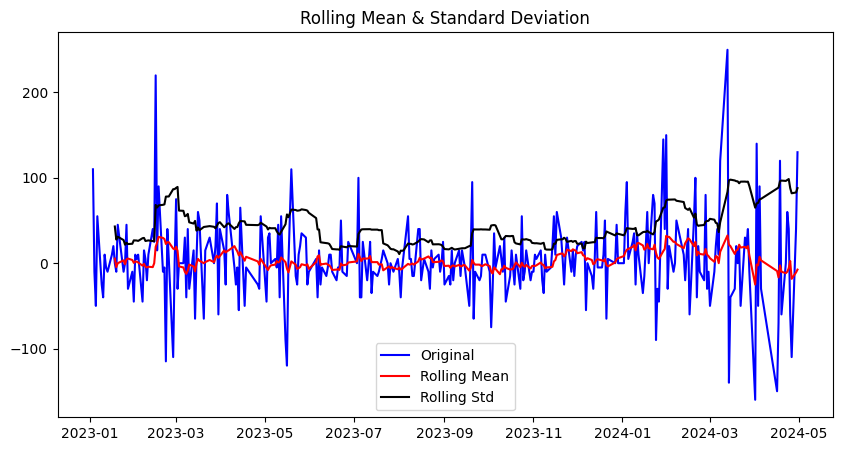

Hasil dari Tes Dickey-Fuller:
Test Statistic               -1.424761e+01
p-values                      1.500079e-26
#Lags Used                    1.000000e+00
Number of Observation Used    3.100000e+02
Critical Value (1%)          -3.451622e+00
Critical Value (5%)          -2.870909e+00
Critical Value (10%)         -2.571762e+00
dtype: float64


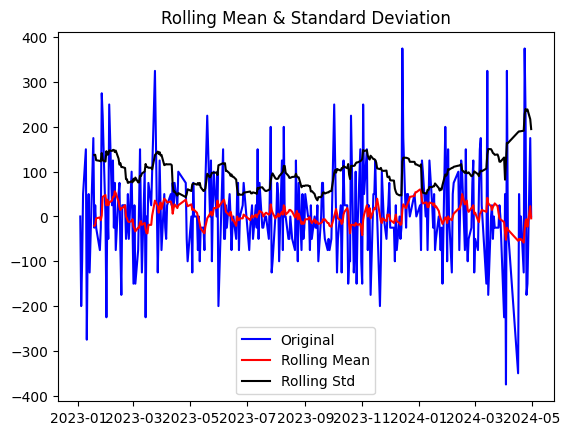

Hasil dari Tes Dickey-Fuller:
Test Statistic               -1.518578e+01
p-values                      6.107674e-28
#Lags Used                    1.000000e+00
Number of Observation Used    3.100000e+02
Critical Value (1%)          -3.451622e+00
Critical Value (5%)          -2.870909e+00
Critical Value (10%)         -2.571762e+00
dtype: float64


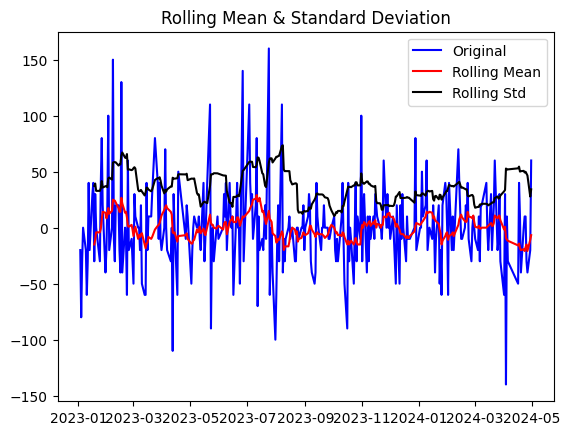

Hasil dari Tes Dickey-Fuller:
Test Statistic                -19.452123
p-values                        0.000000
#Lags Used                      0.000000
Number of Observation Used    311.000000
Critical Value (1%)            -3.451553
Critical Value (5%)            -2.870879
Critical Value (10%)           -2.571746
dtype: float64


In [ ]:
plt.figure(figsize=(10,5))
test_stationarity(ts_diff1_bsi)
test_stationarity(ts_diff1_bca)
test_stationarity(ts_diff1_danamon)

nilai p-value dari uji unit root menggunakan uji Augmented Dickey-Fuller di atas mempunyai nilai lebih kecil dari 0.05. Sehingga tolak h0 dan dapat disimpulkan bahwa data mempunyai akar unit atau data telah stasioner dalam differencing 1.

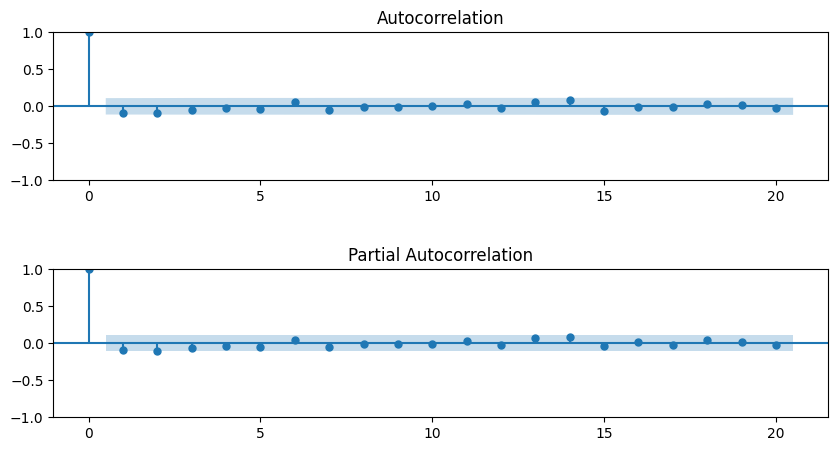

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plot_acf(ts_diff1_bsi, ax=plt.gca(), lags=20)
plt.subplots_adjust(hspace=0.6)
plt.subplot(212)
plot_pacf(ts_diff1_bsi, ax=plt.gca(), lags=20)
plt.show()

Plot ACF dan PACF dibentuk untuk mengetahui orde dari AR dan MA, sehingga bisa diketahui model yang sesuai untuk data

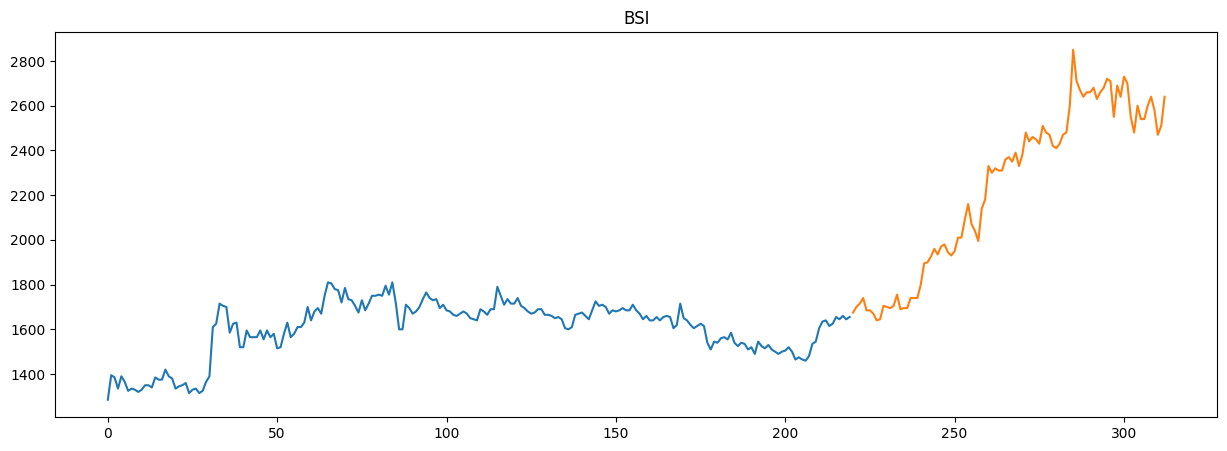

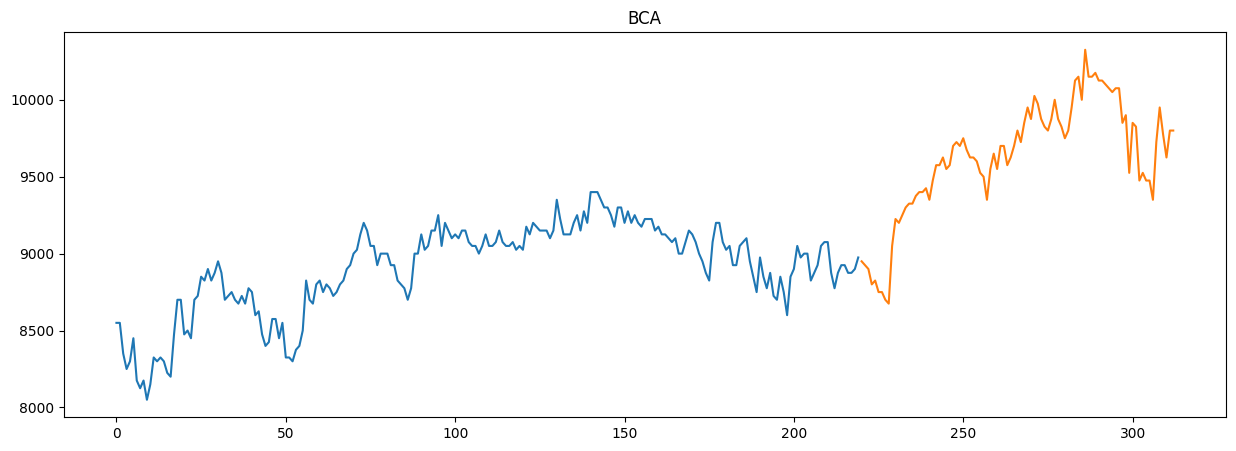

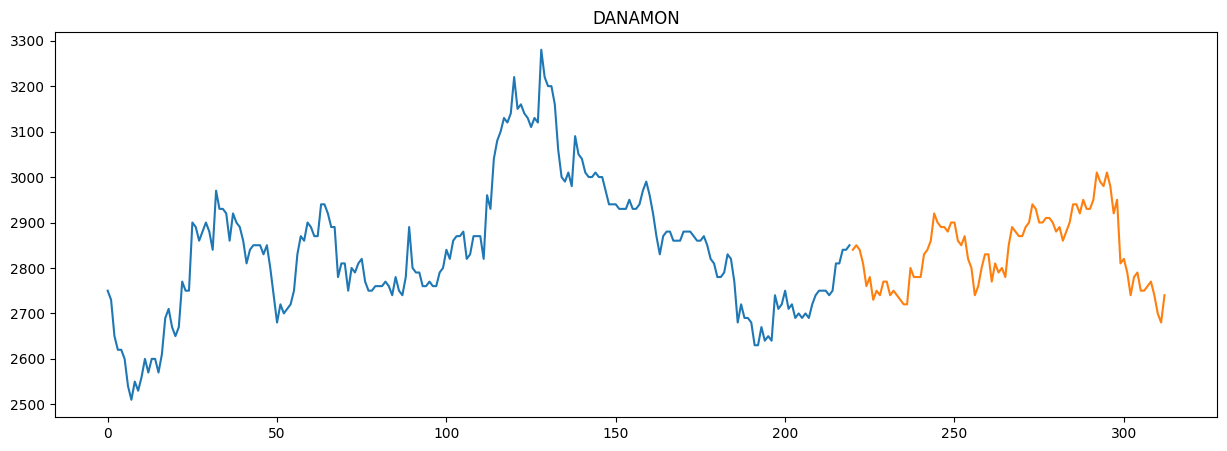

In [ ]:
#Split dataset menjadi train dan test bsi
test_size_bsi=int(len(ts_bsi)*0.3)

train_bsi, test_bsi = df_bsi_baru.iloc[:-test_size_bsi], df_bsi_baru.iloc[-test_size_bsi:]
x_train_bsi, x_test_bsi = np.array(range(train_bsi.shape[0])), np.array(range(train_bsi.shape[0]))
train_bsi.shape,x_train_bsi.shape, test_bsi.shape, x_test_bsi.shape

x_test_bsi = np.arange(len(x_train_bsi), len(df_bsi_baru))
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.title("BSI")
ax.plot(x_train_bsi, train_bsi)
ax.plot(x_test_bsi, test_bsi)

#Split dataset menjadi train dan test bca
test_size_bca=int(len(ts_bca)*0.3)

train_bca, test_bca = df_bca_baru.iloc[:-test_size_bca], df_bca_baru.iloc[-test_size_bca:]
x_train_bca, x_test_bca = np.array(range(train_bca.shape[0])), np.array(range(train_bca.shape[0]))
train_bca.shape,x_train_bca.shape, test_bca.shape, x_test_bca.shape

x_test_bca = np.arange(len(x_train_bca), len(df_bca_baru))
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.title("BCA")
ax.plot(x_train_bca, train_bca)
ax.plot(x_test_bca, test_bca)

#Split dataset menjadi train dan test danamon
test_size_danamon=int(len(ts_danamon)*0.3)

train_danamon, test_danamon = df_danamon_baru.iloc[:-test_size_danamon], df_danamon_baru.iloc[-test_size_danamon:]
x_train_danamon, x_test_danamon = np.array(range(train_danamon.shape[0])), np.array(range(train_danamon.shape[0]))
train_danamon.shape,x_train_danamon.shape, test_danamon.shape, x_test_danamon.shape

x_test_danamon = np.arange(len(x_train_danamon), len(df_danamon_baru))
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.title("DANAMON")
ax.plot(x_train_danamon, train_danamon)
ax.plot(x_test_danamon, test_danamon)

# MEMBUAT MODEL ARIMA TERBAIK

In [ ]:
from pmdarima import auto_arima

# Contoh dengan BSI
d = 1  # Nilai differencing yang sudah ditentukan

# Mencari model terbaik dengan nilai p dan q
model_bsi = auto_arima(train_bsi, d=d, seasonal=False, trace=True)  # seasonal=False karena tidak ada komponen musiman

# Menampilkan summary dari model terbaik untuk BSI
print("Model untuk Data BSI:")
print(model_bsi.summary())

# Contoh dengan BCA
# Mencari model terbaik dengan nilai p dan q untuk data_yuan
model_bca = auto_arima(train_bca, d=d, seasonal=False, trace=True)  # seasonal=False karena tidak ada komponen musiman

# Menampilkan summary dari model terbaik untuk bca
print("\nModel untuk Data BCA:")
print(model_bca.summary())

# Contoh dengan DANAMON
# Mencari model terbaik dengan nilai p dan q untuk data_yuan
model_danamon = auto_arima(train_danamon, d=d, seasonal=False, trace=True)  # seasonal=False karena tidak ada komponen musiman

# Menampilkan summary dari model terbaik untuk danamon
print("\nModel untuk Data danamon:")
print(model_danamon.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2220.293, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2218.161, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2218.197, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2217.896, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2216.594, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2217.524, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.716 seconds
Model untuk Data BSI:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1107.297
Date:                Tue, 14 May 2024   AIC                           2216.594
Time:                        08:26:09   BIC                           2219.983
Sample:                             0   HQIC                       

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

order_bsi = (0, 1, 0)
model_bsi = ARIMA(train_bsi, order=order_bsi)
model_fit_bsi = model_bsi.fit()

# Menampilkan summary dari model untuk BSI
print("Model untuk BSI:")
print(model_fit_bsi.summary())

order_bca = (2, 1, 2)
model_bca = ARIMA(train_bca, order=order_bca)
model_fit_bca = model_bca.fit()

# Menampilkan summary dari model untuk BCA
print("Model untuk BCA:")
print(model_fit_bca.summary())

order_danamon = (0, 1, 0)
model_danamon = ARIMA(train_danamon, order=order_danamon)
model_fit_danamon = model_danamon.fit()

# Menampilkan summary dari model untuk MANDIRI
print("Model untuk Danamon:")
print(model_fit_danamon.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model untuk BSI:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1107.297
Date:                Tue, 14 May 2024   AIC                           2216.594
Time:                        08:30:39   BIC                           2219.983
Sample:                             0   HQIC                          2217.963
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1442.9295     70.801     20.380      0.000    1304.162    1581.697
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):               298.18
Prob(Q):                      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

print('\t ARIMA MODEL : In - Sample Forecasting for BSI \n')

history_bsi = [x for x in train_bsi]
predictions_bsi = []

for t in range(len(test_bsi)):
#     model_bsi = ARIMA(history_bsi, order=order_bsi)
#     model_fit_bsi = model_bsi.fit()
    output_bsi = model_fit_bsi.predict(start=len(test_bsi) + t, end=len(test_bsi) + t)
    yhat_bsi = output_bsi.iloc[0]
    predictions_bsi.append(float(yhat_bsi))
    obs_bsi = test_bsi.iloc[t]
    history_bsi.append(obs_bsi)

    print('predicted = %f, expected = %f' % (float(yhat_bsi), float(obs_bsi)))
    predicted_value_bsi = yhat_bsi

print('\n\t ARIMA MODEL : In - Sample Forecasting for BCA \n')
history_bca = [x for x in train_bca]
predictions_bca = []

for t in range(len(test_bca)):
#     model_bca = ARIMA(history_bca, order=(0, 1, 0))
#     model_fit_bca = model_bca.fit()
    output_bca = model_fit_bca.predict(start=len(test_bca) + t, end=len(test_bca) + t)
    yhat_bca = output_bca.iloc[0]
    predictions_bca.append(float(yhat_bca))
    obs_bca = test_bca.iloc[t]
    history_bca.append(obs_bca)

    print('predicted = %f, expected = %f' % (float(yhat_bca), float(obs_bca)))
    predicted_value_bca = yhat_bca

print('\n\t ARIMA MODEL : In - Sample Forecasting for DANAMON \n')
history_danamon = [x for x in train_danamon]
predictions_danamon = []

for t in range(len(test_danamon)):
#     model_danamon = ARIMA(history_danamon, order=(2, 1, 2))
#     model_fit_danamon = model_danamon.fit()
    output_danamon = model_fit_danamon.predict(start=len(test_danamon) + t, end=len(test_danamon) + t)
    yhat_danamon = output_danamon.iloc[0]
    predictions_danamon.append(float(yhat_danamon))
    obs_danamon = test_danamon.iloc[t]
    history_danamon.append(obs_danamon)

    print('predicted = %f, expected = %f' % (float(yhat_danamon), float(obs_danamon)))
    predicted_value_danamon = yhat_danamon

	 ARIMA MODEL : In - Sample Forecasting for BSI 

predicted = 1700.000000, expected = 1675.000000
predicted = 1735.000000, expected = 1700.000000
predicted = 1765.000000, expected = 1715.000000
predicted = 1740.000000, expected = 1740.000000
predicted = 1730.000000, expected = 1685.000000
predicted = 1735.000000, expected = 1685.000000
predicted = 1695.000000, expected = 1670.000000
predicted = 1710.000000, expected = 1640.000000
predicted = 1685.000000, expected = 1645.000000
predicted = 1680.000000, expected = 1705.000000
predicted = 1665.000000, expected = 1700.000000
predicted = 1660.000000, expected = 1695.000000
predicted = 1670.000000, expected = 1705.000000
predicted = 1680.000000, expected = 1755.000000
predicted = 1670.000000, expected = 1690.000000
predicted = 1650.000000, expected = 1695.000000
predicted = 1645.000000, expected = 1695.000000
predicted = 1640.000000, expected = 1740.000000
predicted = 1690.000000, expected = 1740.000000
predicted = 1680.000000, expected = 17

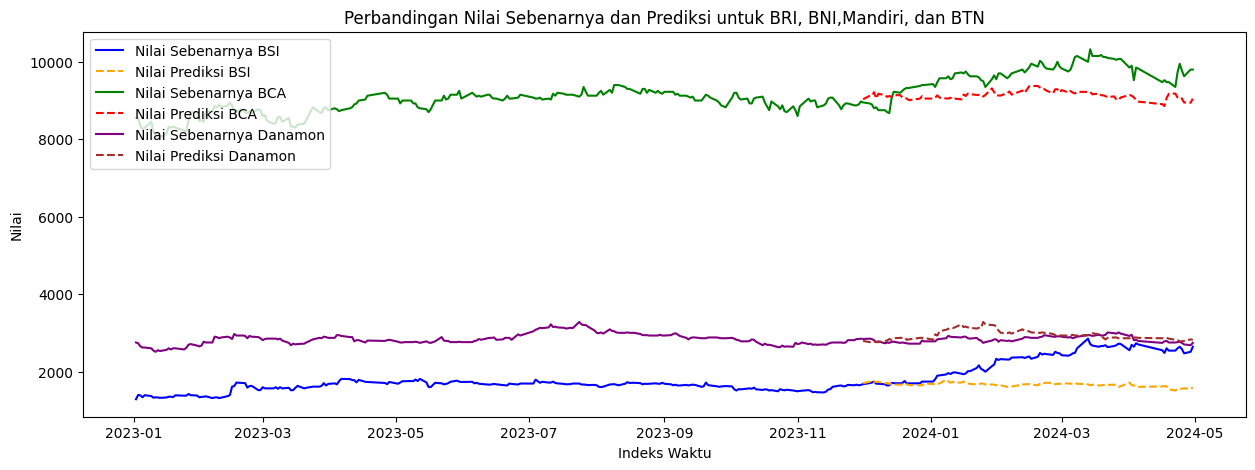

In [ ]:
# Misalkan kita memiliki predictions_bsi, predictions_bca, dan predictions_danamon dari model-model ARIMA sebelumnya

predictions_series_bsi = pd.Series(predictions_bsi, index=test_bsi.index)
predictions_series_bca = pd.Series(predictions_bca, index=test_bca.index)
predictions_series_danamon = pd.Series(predictions_danamon, index=test_danamon.index)

fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(df_bsi_baru['Close'], label='Nilai Sebenarnya BSI', color='blue')
plt.plot(predictions_series_bsi, label='Nilai Prediksi BSI', linestyle='--', color='orange')

plt.plot(df_bca_baru['Close'], label='Nilai Sebenarnya BCA', color='green')
plt.plot(predictions_series_bca, label='Nilai Prediksi BCA', linestyle='--', color='red')

plt.plot(df_danamon_baru['Close'], label='Nilai Sebenarnya Danamon', color='purple')
plt.plot(predictions_series_danamon, label='Nilai Prediksi Danamon', linestyle='--', color='brown')


plt.legend(loc="upper left")
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi untuk BRI, BNI,Mandiri, dan BTN')
plt.xlabel('Indeks Waktu')
plt.ylabel('Nilai')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Misalnya, jika kita memiliki prediksi dan nilai sebenarnya untuk BSI
rmse_bsi = np.sqrt(mean_squared_error(test_bsi, predictions_bsi))
rmse_bca = np.sqrt(mean_squared_error(test_bca, predictions_bca))
rmse_danamon = np.sqrt(mean_squared_error(test_danamon, predictions_danamon))

# Menampilkan nilai RMSE untuk setiap mata uang
print('BSI RMSE: %.4f' % rmse_bsi)
print('BCA RMSE: %.4f' % rmse_bca)
print('Danamon RMSE: %.4f' % rmse_danamon)


BSI RMSE: 695.3086
BCA RMSE: 612.8716
Danamon RMSE: 170.6849


In [ ]:
model_bsi = auto_arima(ts_bsi,order=(0,1,0))
prediksi_bsi = model_bsi.predict(n_periods=20)
print("Prediksi BSI:\n", prediksi_bsi)

model_bca = auto_arima(ts_bca,order=(2,1,2))
prediksi_bca = model_bca.predict(n_periods=20)
print("\nPrediksi BCA:\n", prediksi_bca)

model_danamon = auto_arima(ts_danamon, order=(0,1,0))
prediksi_danamon = model_danamon.predict(n_periods=20)
print("\nPrediksi Danamon:\n", prediksi_danamon)

Prediksi BSI:
 313    2633.600116
314    2631.606467
315    2632.186260
316    2634.269060
317    2637.229685
318    2640.702998
319    2644.475745
320    2648.423375
321    2652.473145
322    2656.582568
323    2660.726833
324    2664.891446
325    2669.067943
326    2673.251382
327    2677.438875
328    2681.628735
329    2685.819978
330    2690.012028
331    2694.204551
332    2698.397348
dtype: float64

Prediksi BCA:
 313    9777.750066
314    9777.547008
315    9777.547008
316    9777.547008
317    9777.547008
318    9777.547008
319    9777.547008
320    9777.547008
321    9777.547008
322    9777.547008
323    9777.547008
324    9777.547008
325    9777.547008
326    9777.547008
327    9777.547008
328    9777.547008
329    9777.547008
330    9777.547008
331    9777.547008
332    9777.547008
dtype: float64

Prediksi Danamon:
 313    2738.343521
314    2741.958001
315    2744.982793
316    2747.936230
317    2750.777414
318    2753.514294
319    2756.150375
320    2758.689398
321    

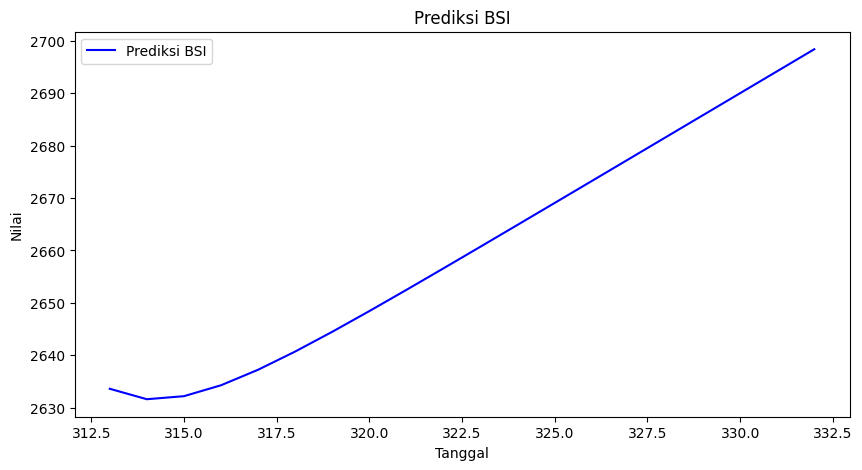

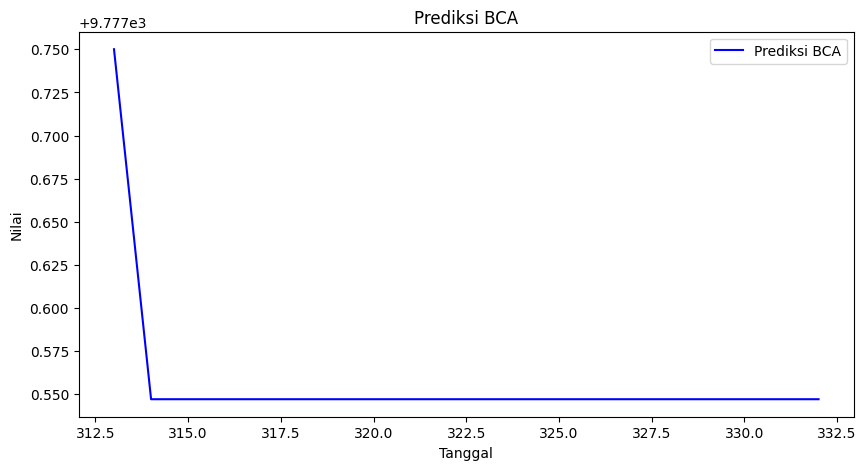

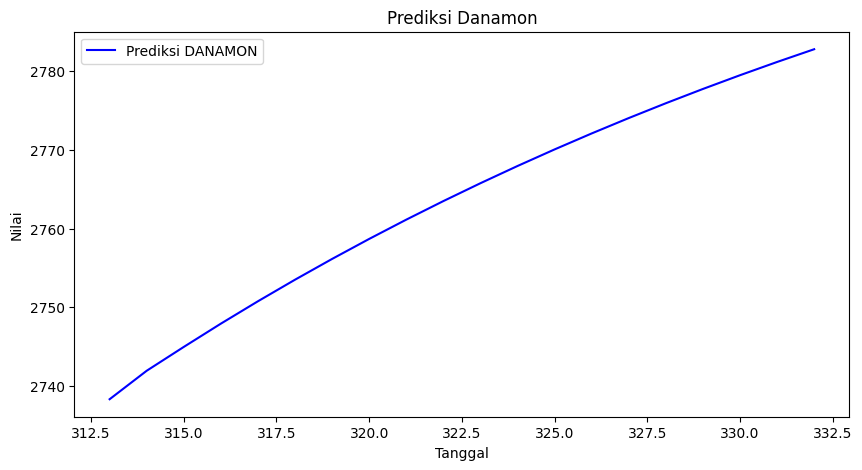

In [ ]:
# Plot untuk prediksi BSI
plt.figure(figsize=(10, 5))
plt.plot(prediksi_bsi.index, prediksi_bsi, label='Prediksi BSI', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi BSI')
plt.legend()
plt.show()

# Plot untuk prediksi BCA
plt.figure(figsize=(10, 5))
plt.plot(prediksi_bca.index, prediksi_bca, label='Prediksi BCA', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi BCA')
plt.legend()
plt.show()

# Plot untuk prediksi DANAMON
plt.figure(figsize=(10, 5))
plt.plot(prediksi_danamon.index, prediksi_danamon, label='Prediksi DANAMON', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi Danamon')
plt.legend()
plt.show()
